<a href="https://colab.research.google.com/github/valdirdpg/curso-dnc/blob/master/Bibliotecas_Python_V2_Numpy%2C_Pandas_e_Matplot_%5BValdir%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A utilização dos dados para analisar a estrutura do RH e os perfis dos colaboradores de uma empresa é algo essencial nos dias atuais com o advendo da tecnologia. Traçar um perfil ou entender como é o quadro de funcionários se tornou algo muito mais fácil com a utilização de ferramentas como excel, power bi e python. Neste contexto, você utilizando o dataset [Human Resources Data Set](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set), e o glossário de todos as variáveis está disponível no [Codebook](https://rpubs.com/rhuebner/hrd_cb_v14), você dee responder as 10 perguntas para praticar os conceitos adquiridos nas aulas sobre bibliotecas e para aprender funções ou conceitos novos.
- 1 - Quantas pessoas diferentes o RH mapeou no estudo (Nome diferentes - Usando pandas e Numpy)?
- 2 - Calcule a porcentagem dos colaboradores por Estado (State) (Faça em Pandas e Numpy).
- 3 - Com os dados calculados na etapa anterior, crie um gráfico de barras dos 3 estados com mais funcionários e o número de funcionários (Faça o processo em Matplot, Seaborn e Plotly)
- 4 - Utilizando o Seaborn e o Plotly, calcule através de um gráfico quantos colaboradores cada manager é responsável. (Dica: se não souber, pesquise por countplot ou histogram)
- 5 - Crie um dataframe chamado df_hired com os trabalhadores que ainda não foram demitidos. (Coluna DateofTermination nula)
- 6 - Utilizando o dataframe da questão anterior, sabendo que o salário nos EUA é um valor anual, calcule o quanto cada colaborador deveria ter juntado se estivesse trabalhando até final de 2022. Considere um imposto anual de 5%, qual seria o valor final?
- 7 - Usando somente o Seaborn e Plotly, construa um gráfico que mostre o a quantidade de Pessoas do gênero Masculino e Feminino em cada grupo conjugal (Eixo x = MaritalDesc)
- 8 - Crie um gráfico usando a função barplot do Searbon para a variável Salary agrupando por SpecialProjectsCount. Quais informações podem ser obtidas através desse gráfico?
- 9 - Utilizando a função groupby e as agregações do pandas, calcule a média salarial (separadamente) por Departamento, por Raça e Position
- 10 - Obter informações rápidas e fáceis acerca dos dados é algo crucial na análise dos dados. Saber por exemplo quantos nulos, média, desvio padrão, tipo dos dados e outras informações é algo crucial no dia a dia do Cientista de Dados. Realize um df.info() e responda quais informações podemos tirar destes dados?


## Import e seleção dos dados

In [130]:
#-- Importação de bibliotecas e dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#-- Import via colab
# from google.colab import files
# files.upload()
# df = pd.read_csv('/content/HRDataset_v14.csv')

#-- Import via drive
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dnc/Dataset/HRDataset_v14.csv')




## 1 - Quantas pessoas diferentes o RH mapeou no estudo (Nome diferentes - Usando pandas e Numpy)?
Resposta: 311

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
hrd = pd.read_csv('/content/drive/MyDrive/ARQUIVOS-DNC/HRDataset_v14.csv')

In [10]:
print(hrd.shape)
hrd.head(0)

(311, 36)


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [50]:
# Resposta 1 com Pandas
hrd.duplicated()
hrd1 = list(hrd['Employee_Name'].duplicated())
hrd1.count(False)

0

In [64]:
# Resposta 1 com Numpy
hrd2 = list(hrd['EmpID'])
hr3 = np.unique(hrd2)
hr3.size

311

## 2 - Calcule a porcentagem dos colaboradores por Estado (State) (Faça em Pandas e Numpy).

In [110]:
col = hrd.filter(items=['State','Employee_Name'])
print(col)
col1 = list(hrd['State']=='MA')
col1.count(True)

    State             Employee_Name
0      MA       Adinolfi, Wilson  K
1      MA  Ait Sidi, Karthikeyan   
2      MA         Akinkuolie, Sarah
3      MA              Alagbe,Trina
4      MA          Anderson, Carol 
..    ...                       ...
306    MA            Woodson, Jason
307    MA        Ybarra, Catherine 
308    MA          Zamora, Jennifer
309    MA               Zhou, Julia
310    MA             Zima, Colleen

[311 rows x 2 columns]


276

In [105]:
valor = col.groupby('State').size().reset_index(name='qtd')

valor['Percentual'] = (valor['qtd'] / valor['qtd'].sum()) * 100
valor

,State,qtd,Percentual
0,AL,1,0.321543
1,AZ,1,0.321543
2,CA,1,0.321543
3,CO,1,0.321543
4,CT,6,1.929260
5,FL,1,0.321543
6,GA,1,0.321543
7,ID,1,0.321543
8,IN,1,0.321543
9,KY,1,0.321543


## 3 - Com os dados calculados na etapa anterior, crie um gráfico de barras dos 3 estados com mais funcionários e o número de funcionários (Faça o processo em Matplot, Seaborn e Plotly)

In [134]:
valor2 = valor.filter(items=['State', 'qtd'])
estado_qtd = valor2.nlargest(3,'qtd').reset_index()

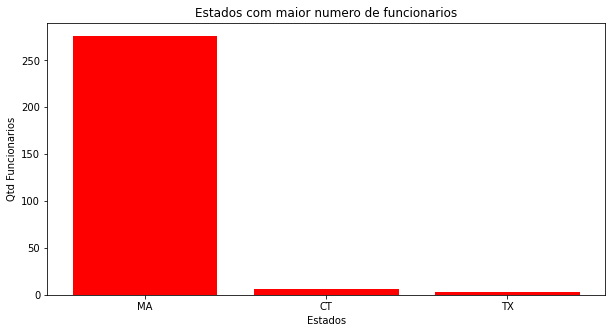

In [139]:
fig = plt.figure(figsize=(10,5))
plt.title('Estados com maior numero de funcionarios')
plt.ylabel('Qtd Funcionarios')
plt.xlabel('Estados')
plt.bar(estado_qtd['State'], estado_qtd['qtd'], color='red')
fig.show()

## 4 - Utilizando o Seaborn e o Plotly, calcule através de um gráfico quantos colaboradores cada manager é responsável. (Dica: se não souber, pesquise por countplot ou histogram)

## 5 - Crie um dataframe chamado df_hired com os trabalhadores que ainda não foram demitidos. (Coluna DateofTermination nula)

## 6 - Utilizando o dataframe da questão anterior, sabendo que o salário nos EUA é um valor anual, calcule o quanto cada colaborador deveria ter juntado se estivesse trabalhando até final de 2022. Considere um imposto anual de 5%, qual seria o valor final?

## 7 - Usando somente o Seaborn e Plotly, construa um gráfico que mostre o a quantidade de Pessoas do gênero Masculino e Feminino em cada grupo conjugal (Eixo x = MaritalDesc)

## 8 - Crie um gráfico usando a função barplot do Searbon para a variável Salary agrupando por SpecialProjectsCount. Quais informações podem ser obtidas através desse gráfico?

## 9 - Utilizando a função groupby e as agregações do pandas, calcule a média salarial (separadamente) por Departamento, por Raça e Position

In [ ]:
df.groupby('Department', as_index = False).agg({'Salary':'mean'})

,Department,Salary
0,Admin Offices,71791.888889
1,Executive Office,250000.000000
2,IT/IS,97064.640000
3,Production,59953.545455
4,Sales,69061.258065
5,Software Engineering,94989.454545


In [ ]:
df.groupby('RaceDesc', as_index = False).agg({'Salary':'mean'})

,RaceDesc,Salary
0,American Indian or Alaska Native,65806.000000
1,Asian,68521.206897
2,Black or African American,74431.025000
3,Hispanic,83667.000000
4,Two or more races,59998.181818
5,White,67287.545455


In [ ]:
df.groupby('Position', as_index = False).agg({'Salary':'mean'})

,Position,Salary
0,Accountant I,63507.666667
1,Administrative Assistant,52280.000000
2,Area Sales Manager,64932.555556
3,BI Developer,95465.000000
4,BI Director,110929.000000
5,CIO,220450.000000
6,Data Analyst,89932.571429
7,Data Analyst,88527.000000
8,Data Architect,150290.000000
9,Database Administrator,108499.600000


## 10 - Obter informações rápidas e fáceis acerca dos dados é algo crucial na análise dos dados. Saber por exemplo quantos nulos, média, desvio padrão, tipo dos dados e outras informações é algo crucial no dia a dia do Cientista de Dados. Realize um df.info() e responda quais informações podemos tirar destes dados?